In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving tv.csv to tv.csv


**1. Importing Data**

In [ ]:
import pandas as pd
import io

In [ ]:
halftime_musicians = pd.read_csv('halftime_musicians.csv')

In [ ]:
tv = pd.read_csv('tv.csv')

In [ ]:
super_bowls = pd.read_csv('super_bowl.csv')

In [ ]:
# Inspecting the data
tv.info()
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        53 non-null     int64  
 1   super_bowl        53 non-null     int64  
 2   network           53 non-null     object 
 3   avg_us_viewers    53 non-null     int64  
 4   total_us_viewers  15 non-null     float64
 5   rating_household  53 non-null     float64
 6   share_household   53 non-null     int64  
 7   rating_18_49      15 non-null     float64
 8   share_18_49       6 non-null      float64
 9   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 4.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  134 non-null    int64  
 1   super_bowl  134 non-null    int64  
 2 

**2.**
* *Visualize the distribution of Combined Points*
* *Checking Super Bowls with highest and lowest scores*

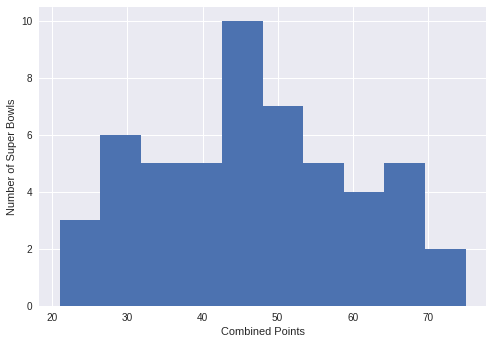



Super Bowl data for combined points greater than 70 



,Unnamed: 0,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23




Super Bowl data for combined points less than 25 



,Unnamed: 0,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [ ]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
# ... YOUR CODE FOR TASK 3 ...
plt.hist(super_bowls.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
print("\n")
print("Super Bowl data for combined points greater than 70 \n")
display(super_bowls[super_bowls['combined_pts'] > 70])
print("\n")
print("Super Bowl data for combined points less than 25 \n")
display(super_bowls[super_bowls['combined_pts'] < 25])

**3. Point Difference Distribution**

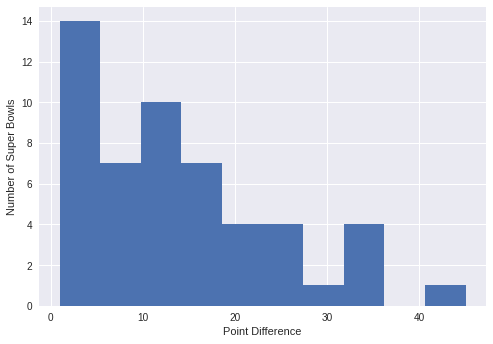

,Unnamed: 0,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,Unnamed: 0,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [ ]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

**4.**

*   *Do large point differences translate to lost viewers?* 
*   *We can plot household share (average percentage of U.S. households with a TV in use that were watching for the entire broadcast) vs. point difference to find out.*



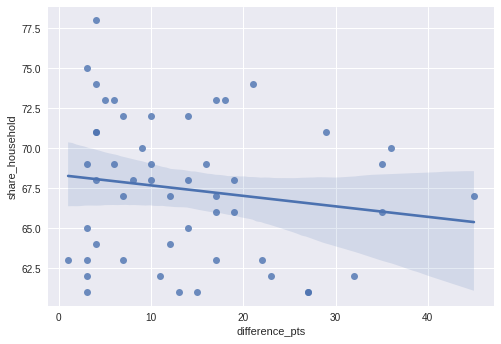

In [ ]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x='difference_pts', y='share_household', data=games_tv)


* *The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common.*
* *The linear relationship in the data is weak due to our small sample size of 52 games.*



**5. Viewership and the ad industry over time**


* *Most people tend to stick it out for the halftime show, which is good news for the TV networks and advertisers.*
* *A 30-second spot costs almost $5 million now, but has it always been that way?*
* *And how have number of viewers and household ratings trended alongside ad cost?*
* *We can find out using line plots that share a "Super Bowl" x-axis.*





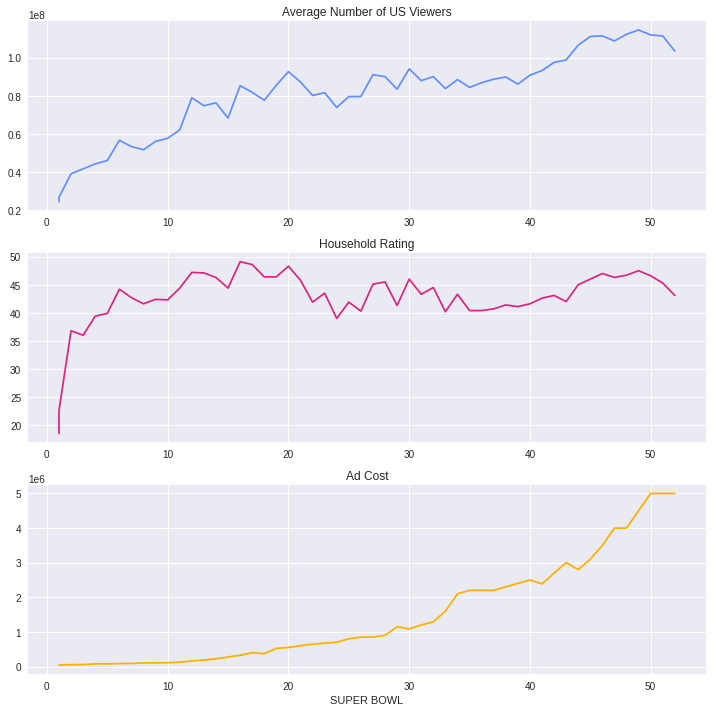

In [ ]:
# Created a figure with 3x1 subplot
plt.subplot(3, 1, 1) 
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')
plt.rcParams["figure.figsize"] = (20,10)


# Middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Household Rating')


# Bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')


# Improve the spacing between subplots
plt.tight_layout()

**6. Halftime shows weren't always this great**
* *We can see viewers increased before ad costs did.*
* *Another hypothesis: maybe halftime shows weren't that good in the earlier years? The modern spectacle of the Super Bowl has a lot to do with the cultural prestige of big halftime acts. After some research it turns out the old ones weren't up to today's standards.*
* *It turns out Michael Jackson's Super Bowl XXVII performance, one of the most watched events in American TV history, was when the NFL realized the value of Super Bowl airtime and decided they needed to sign big name acts from then on out.*
* *The halftime shows before MJ indeed weren't that impressive, which we can see by filtering our halftime_musician data.*





In [ ]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII (All musicians that performed in the years before MJ)
display(halftime_musicians[halftime_musicians['super_bowl'] <= 27])

,Unnamed: 0,super_bowl,musician,num_songs
80,80,27,Michael Jackson,5.0
81,81,26,Gloria Estefan,2.0
82,82,26,University of Minnesota Marching Band,NaN
83,83,25,New Kids on the Block,2.0
84,84,24,Pete Fountain,1.0
85,85,24,Doug Kershaw,1.0
86,86,24,Irma Thomas,1.0
87,87,24,Pride of Nicholls Marching Band,NaN
88,88,24,The Human Jukebox,NaN
89,89,24,Pride of Acadiana,NaN


**7. Who has the most halftime show appearances?**
* *Let's see all of the musicians that have done more than one halftime show, including their performance counts.*



In [ ]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
display(halftime_appearances[halftime_appearances['super_bowl'] > 1])

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


**8. Who performed the most songs in a halftime show?**

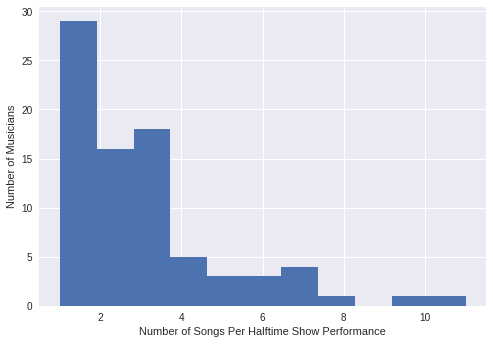

,Unnamed: 0,super_bowl,musician,num_songs
0,0,52,Justin Timberlake,11.0
70,70,30,Diana Ross,10.0
10,10,49,Katy Perry,8.0
2,2,51,Lady Gaga,7.0
90,90,23,Elvis Presto,7.0
33,33,41,Prince,7.0
16,16,47,Beyoncé,7.0
14,14,48,Bruno Mars,6.0
3,3,50,Coldplay,6.0
25,25,45,The Black Eyed Peas,6.0


In [ ]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

*Most non-band musicians do 1-3 songs per halftime show. It's important to note that the duration of the halftime show is fixed (roughly 12 minutes) so songs per performance is more a measure of how many hit songs you have.*

**Conclusion**

1. This project involved loading, cleaning, then exploring Super Bowl game, television, and halftime show data.

2. Visualized the distributions of combined points, point differences, and halftime show performances using histograms.

3. Used line plots to see how ad cost increases lagged behind viewership increases.

4. Discovered that blowouts do appear to lead to a drop in viewers.

5. Analyzed the musicians with the most halftime show appearances and also found the musicians who performed the most songs in a halftime show.

